In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [205]:
# Load dataframes
df = pd.read_csv(r'D:\Housing\data\train.csv')
d = pd.read_csv(r'D:\Housing\data\test.csv')
df.drop('Id',axis=1,inplace=True)
d.drop('Id',axis=1,inplace=True)

In [206]:
# MSSubClass despite being a number, is categorical. Hence this column can be converted to catgeorical.
df['MSSubClass'] = df['MSSubClass'].astype(str)
d['MSSubClass'] = d['MSSubClass'].astype(str)

In [207]:
# List of numeric features
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

# List of categorical features
categorical_features = df.select_dtypes(include=[object]).columns.tolist()

print("Numeric Features:", numeric_features)
print("Categorical Features:", categorical_features)

Numeric Features: ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Categorical Features: ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', '

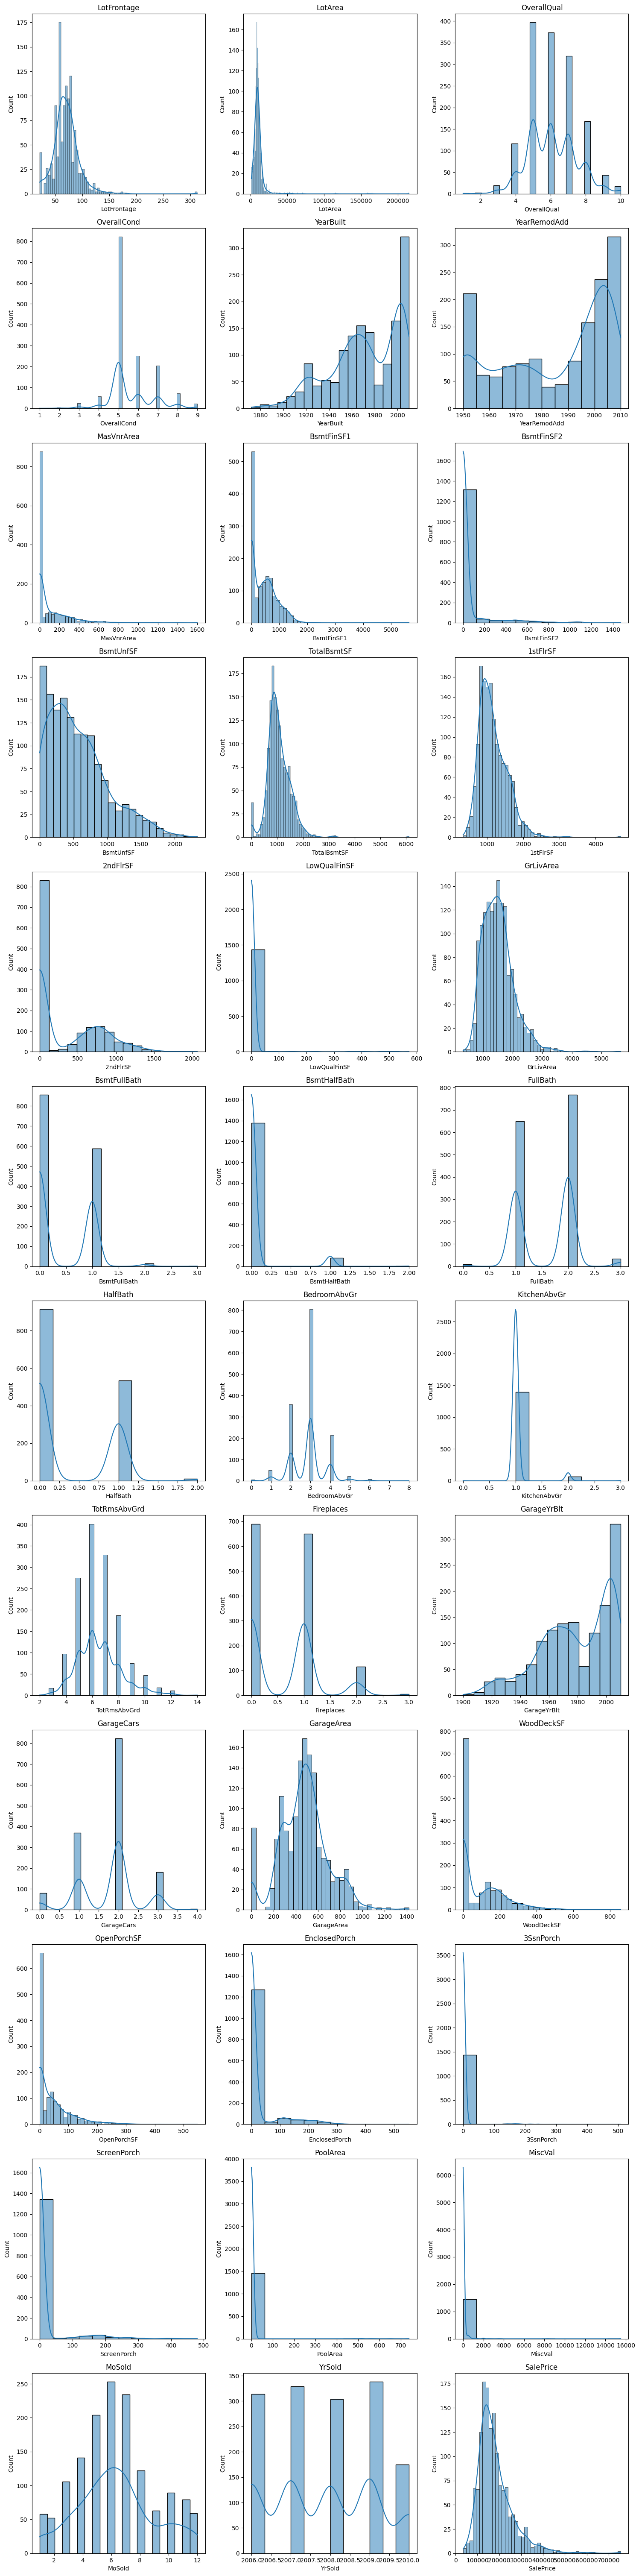

In [208]:
# Number of numerical features
num_features = len(numeric_features)

# Number of rows and columns for subplots
nrows = (num_features // 3) + 1
ncols = 3

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each numerical feature
for i, feature in enumerate(numeric_features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(feature)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [209]:
# Check distributions of certain columns.
l = ['EnclosedPorch', 'ScreenPorch', '3SsnPorch','PoolArea','MiscVal']
for col in l:
    most_freq_val = df[col].value_counts(normalize=True).max() * 100
    print(f"The most frequent value in {col} appears {most_freq_val:.2f}% of the time.")

The most frequent value in EnclosedPorch appears 85.75% of the time.
The most frequent value in ScreenPorch appears 92.05% of the time.
The most frequent value in 3SsnPorch appears 98.36% of the time.
The most frequent value in PoolArea appears 99.52% of the time.
The most frequent value in MiscVal appears 96.44% of the time.


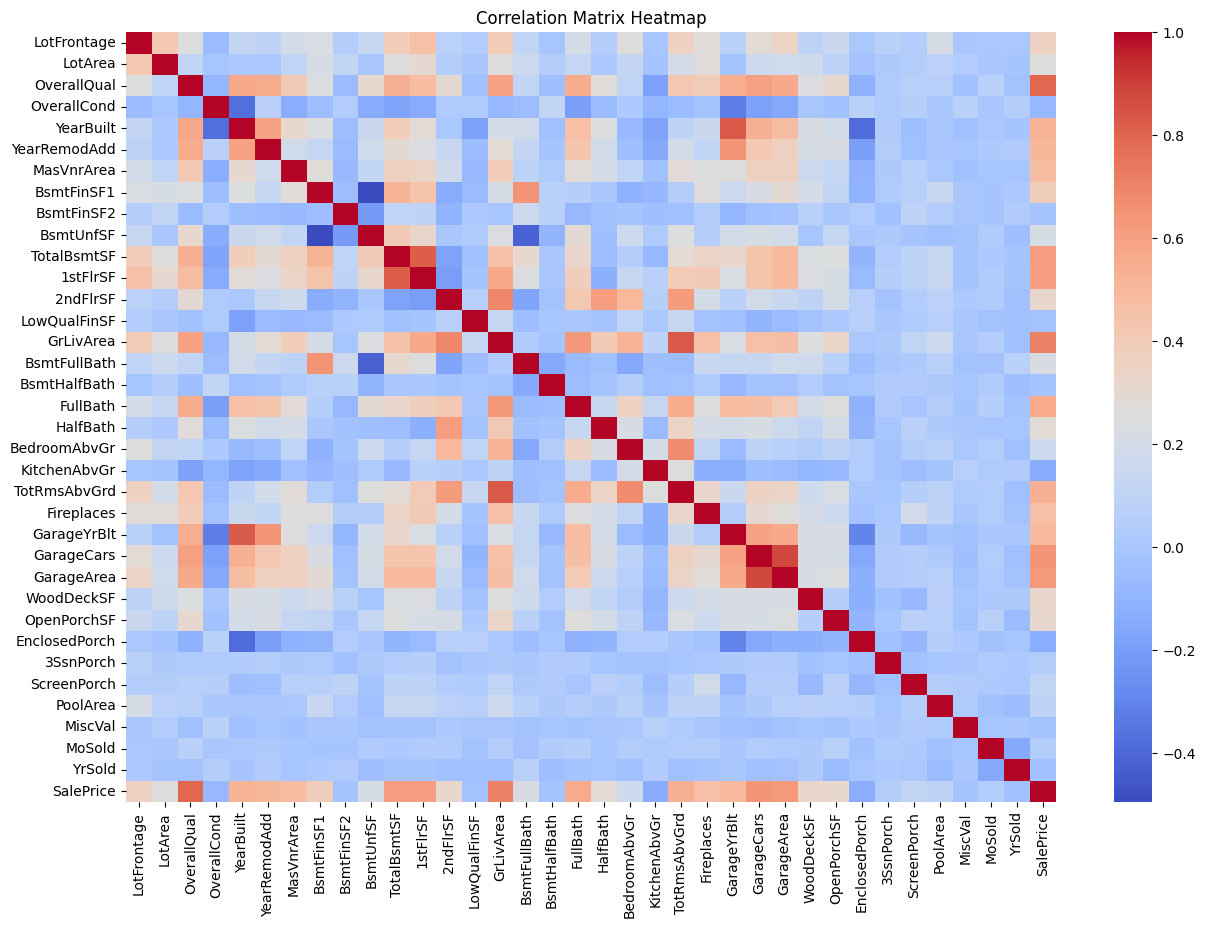

In [210]:
# Calculate the correlation matrix
corr_matrix = df[numeric_features].corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix Heatmap')
plt.show()

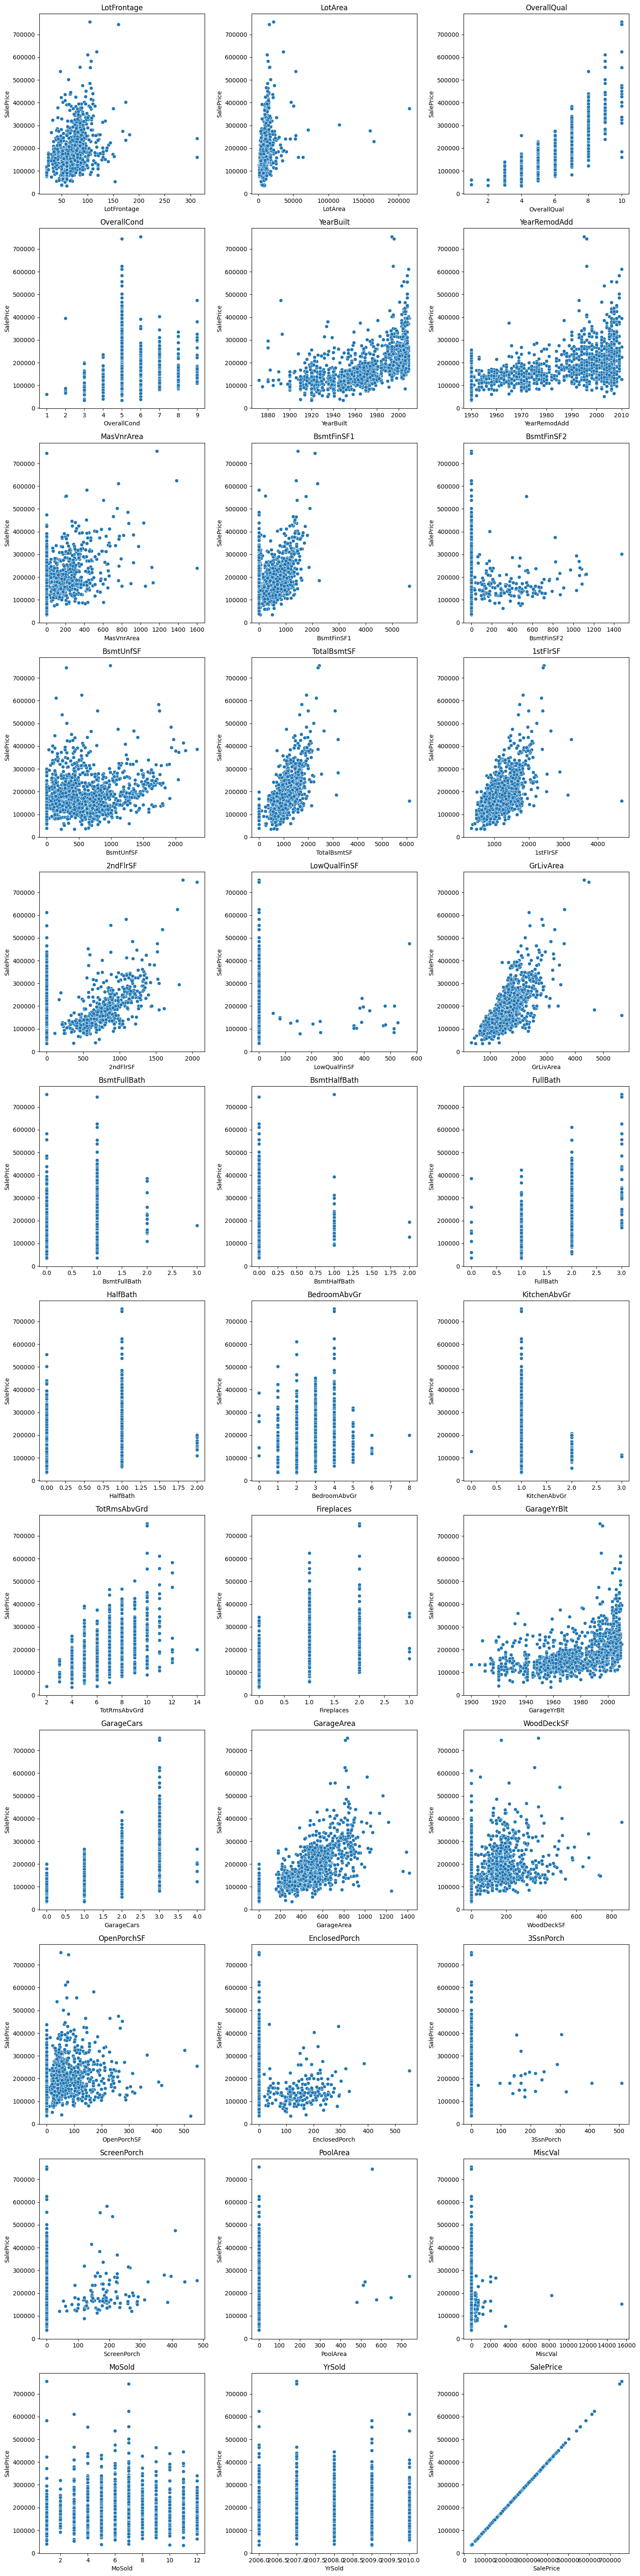

In [211]:
# Number of numerical features
num_features = len(numeric_features)

# Number of rows and columns for subplots
nrows = (num_features // 3) + 1
ncols = 3

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each numerical feature against SalePrice
for i, feature in enumerate(numeric_features):
    sns.scatterplot(x=df[feature], y=df['SalePrice'], ax=axes[i])
    axes[i].set_title(feature)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [212]:
# Calculate the correlation matrix
corr_matrix = df[numeric_features].corr().abs()

# Find pairs of features with correlation greater than 0.75
high_corr_pairs = [(i, j, corr_matrix.loc[i, j]) for i in corr_matrix.columns for j in corr_matrix.columns if i != j and corr_matrix.loc[i, j] > 0.75]

# Remove duplicate pairs
high_corr_pairs = list(set(tuple(sorted(pair[:2])) + (pair[2],) for pair in high_corr_pairs))

# Print the pairs
for pair in high_corr_pairs:
    print(f"Pair: {pair[0]} - {pair[1]}, Correlation: {pair[2]:.2f}")

Pair: GarageArea - GarageCars, Correlation: 0.88
Pair: GrLivArea - TotRmsAbvGrd, Correlation: 0.83
Pair: 1stFlrSF - TotalBsmtSF, Correlation: 0.82
Pair: OverallQual - SalePrice, Correlation: 0.79
Pair: GarageYrBlt - YearBuilt, Correlation: 0.83


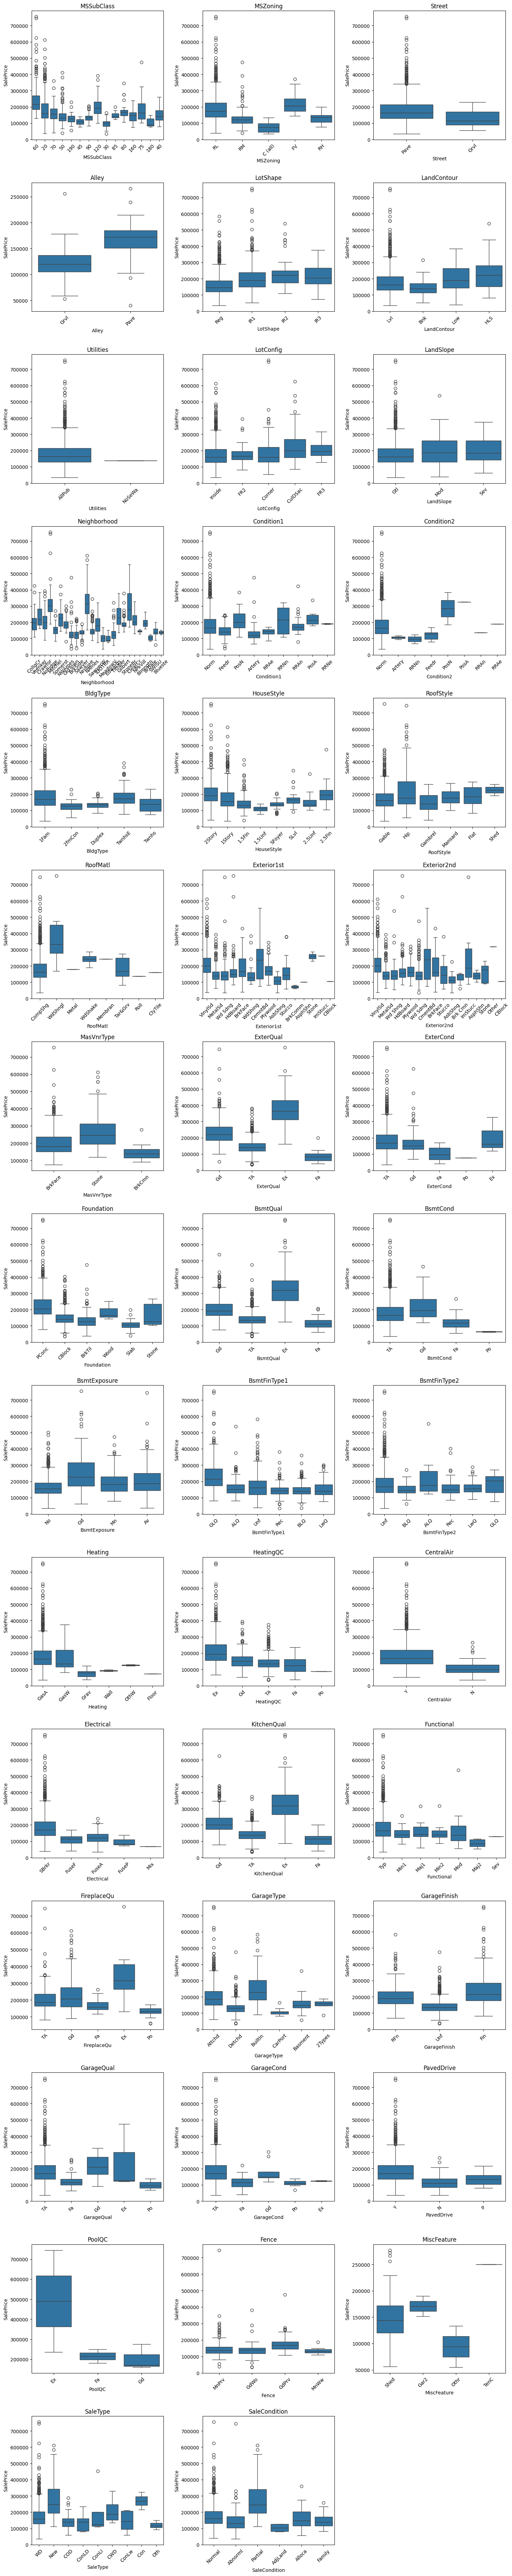

In [213]:
# Number of categorical features
cat_features = len(categorical_features)

# Number of rows and columns for subplots
nrows = (cat_features // 3) + 1
ncols = 3

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each categorical feature
for i, feature in enumerate(categorical_features):
    sns.boxplot(x=feature, y='SalePrice', data=df, ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

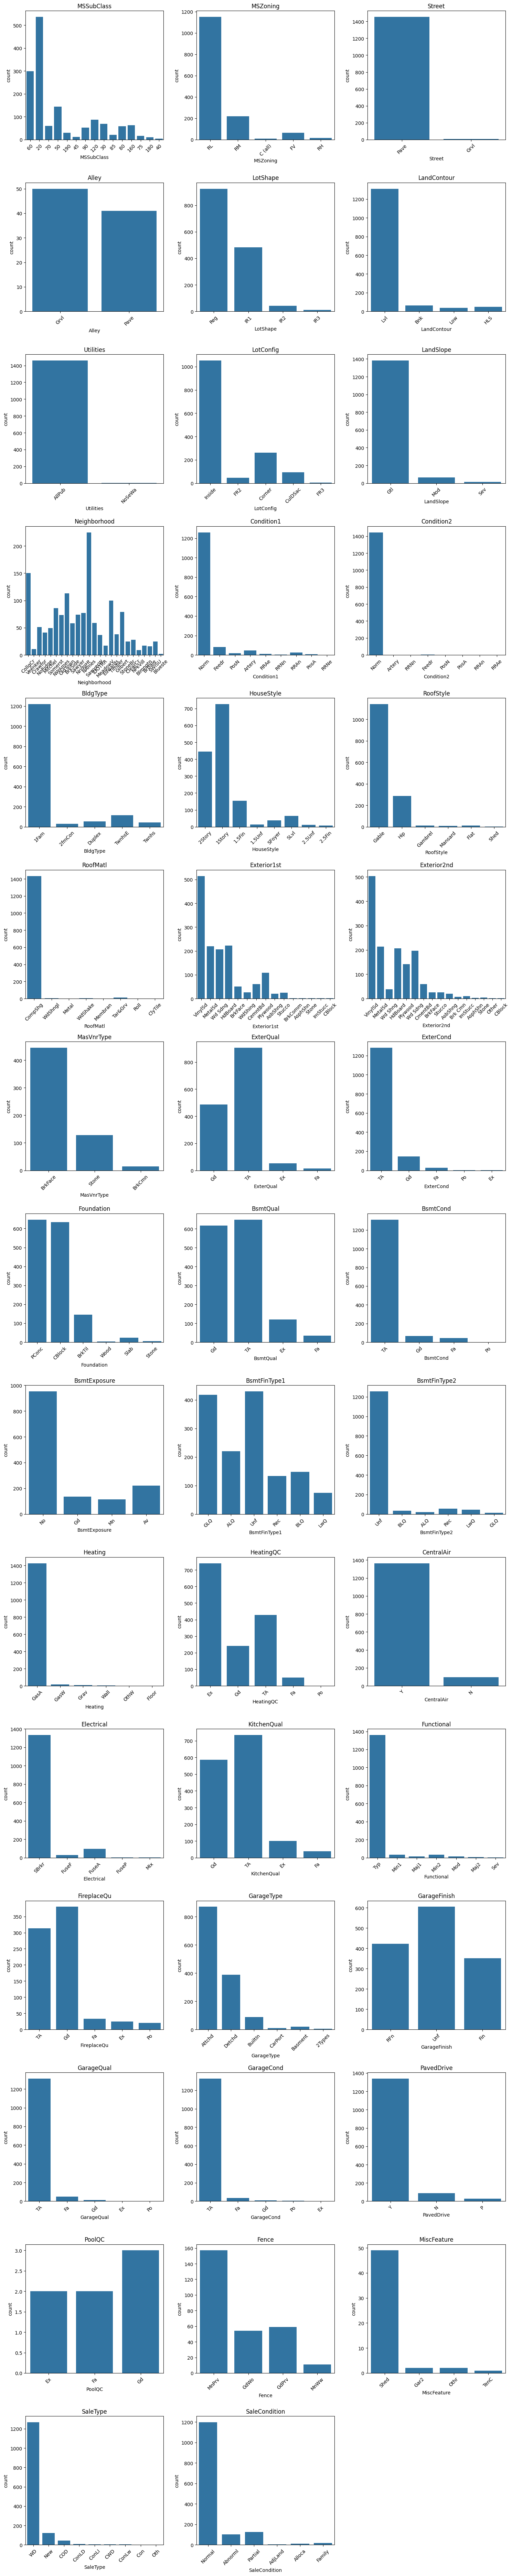

In [214]:
# Number of categorical features
cat_features = len(categorical_features)

# Number of rows and columns for subplots
nrows = (cat_features // 3) + 1
ncols = 3

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each categorical feature
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=df, ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [215]:
columns_to_check = ['RoofMatl', 'Heating', 'Utilities', 'Functional', 'GarageCond', 'Street', 'Condition2','LandSlope']

for col in columns_to_check:
    most_freq_val = df[col].value_counts(normalize=True).max() * 100
    print(f"The most frequent value in {col} appears {most_freq_val:.2f}% of the time.")

The most frequent value in RoofMatl appears 98.22% of the time.
The most frequent value in Heating appears 97.81% of the time.
The most frequent value in Utilities appears 99.93% of the time.
The most frequent value in Functional appears 93.15% of the time.
The most frequent value in GarageCond appears 96.16% of the time.
The most frequent value in Street appears 99.59% of the time.
The most frequent value in Condition2 appears 98.97% of the time.
The most frequent value in LandSlope appears 94.66% of the time.


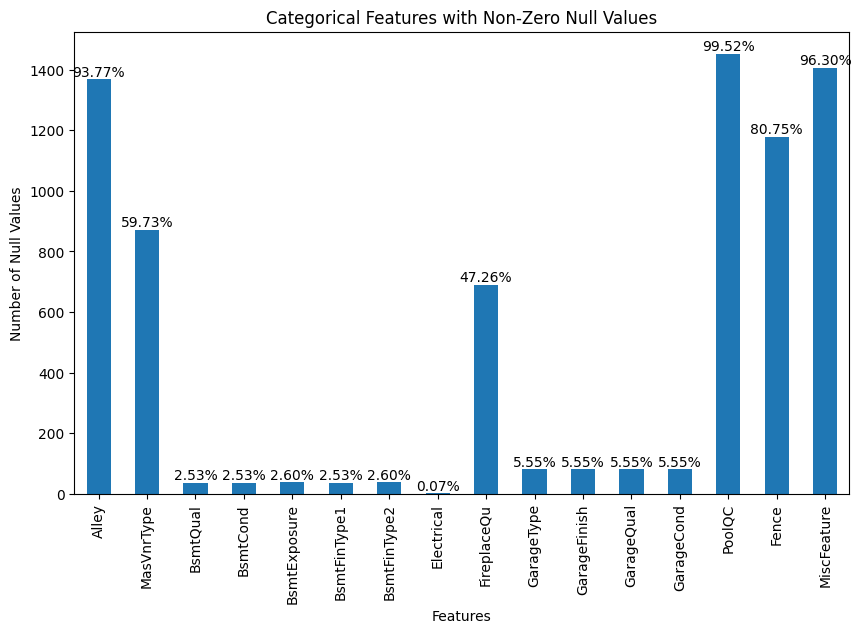

In [216]:
# Find categorical features with non-zero null values
cat_null_counts = df[categorical_features].isnull().sum()
cat_non_zero_nulls = cat_null_counts[cat_null_counts > 0]

# Plot the null counts
plt.figure(figsize=(10, 6))
cat_non_zero_nulls.plot(kind='bar')
plt.title('Categorical Features with Non-Zero Null Values')
plt.xlabel('Features')
plt.ylabel('Number of Null Values')
for i, v in enumerate(cat_non_zero_nulls):
    plt.text(i, v + 0.5, f"{(v / len(df) * 100):.2f}%", ha='center', va='bottom')
plt.show()

Data Processing

In [217]:
df['Alley'].fillna('NA', inplace=True)
d['Alley'].fillna('NA', inplace=True)

In [218]:
df['PoolQC'].value_counts()

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

In [219]:
df.drop('PoolQC', axis=1, inplace=True)
d.drop('PoolQC', axis=1, inplace=True)

In [220]:
df.drop('MiscFeature', axis=1, inplace=True)
d.drop('MiscFeature', axis=1, inplace=True)

In [221]:
df['Fence'].fillna('NA', inplace=True)
d['Fence'].fillna('NA', inplace=True)

In [222]:
bsmt_features = [col for col in categorical_features if 'Bsmt' in col]

for col in bsmt_features:
    df[col].fillna('NA', inplace=True)
    d[col].fillna('NA', inplace=True)

In [223]:
mean_total_bsmt_sf_na = df[df['BsmtQual'] == 'NA']['TotalBsmtSF'].mode()
print(f"Mean TotalBsmtSF when BsmtQual is 'NA': {mean_total_bsmt_sf_na}")

Mean TotalBsmtSF when BsmtQual is 'NA': 0    0
Name: TotalBsmtSF, dtype: int64


In [224]:
# Obtain the mode of the 'Electrical' column in df
mode_electrical = df['Electrical'].mode()[0]

# Fill missing values in 'Electrical' column in both df and d
df['Electrical'].fillna(mode_electrical, inplace=True)
d['Electrical'].fillna(mode_electrical, inplace=True)

In [225]:
df['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [226]:
df['MasVnrType'].fillna('NA', inplace=True)
d['MasVnrType'].fillna('NA', inplace=True)

In [227]:
# Filter the dataframe where MasVnrType is 'NA'
mas_vnr_na = df[df['MasVnrType'] == 'NA']['MasVnrArea']

# Calculate mean, median, and mode
mean_mas_vnr_na = mas_vnr_na.mean()
median_mas_vnr_na = mas_vnr_na.median()
mode_mas_vnr_na = mas_vnr_na.mode()[0]

print(f"Mean of MasVnrArea when MasVnrType is 'NA': {mean_mas_vnr_na}")
print(f"Median of MasVnrArea when MasVnrType is 'NA': {median_mas_vnr_na}")
print(f"Mode of MasVnrArea when MasVnrType is 'NA': {mode_mas_vnr_na}")

Mean of MasVnrArea when MasVnrType is 'NA': 1.0949074074074074
Median of MasVnrArea when MasVnrType is 'NA': 0.0
Mode of MasVnrArea when MasVnrType is 'NA': 0.0


In [228]:
garage_features = [col for col in categorical_features if 'Garage' in col]

for col in garage_features:
    df[col].fillna('NA', inplace=True)
    d[col].fillna('NA', inplace=True)

In [229]:
# Filter the dataframe where GarageQual is 'NA'
garage_area_na = df[df['GarageQual'] == 'NA']['GarageArea']

# Calculate mean, median, and mode
mean_garage_area_na = garage_area_na.mean()
median_garage_area_na = garage_area_na.median()
mode_garage_area_na = garage_area_na.mode()[0]

print(f"Mean of GarageArea when GarageQual is 'NA': {mean_garage_area_na}")
print(f"Median of GarageArea when GarageQual is 'NA': {median_garage_area_na}")
print(f"Mode of GarageArea when GarageQual is 'NA': {mode_garage_area_na}")

Mean of GarageArea when GarageQual is 'NA': 0.0
Median of GarageArea when GarageQual is 'NA': 0.0
Mode of GarageArea when GarageQual is 'NA': 0


In [230]:
df['FireplaceQu'].fillna('NA', inplace=True)
d['FireplaceQu'].fillna('NA', inplace=True)

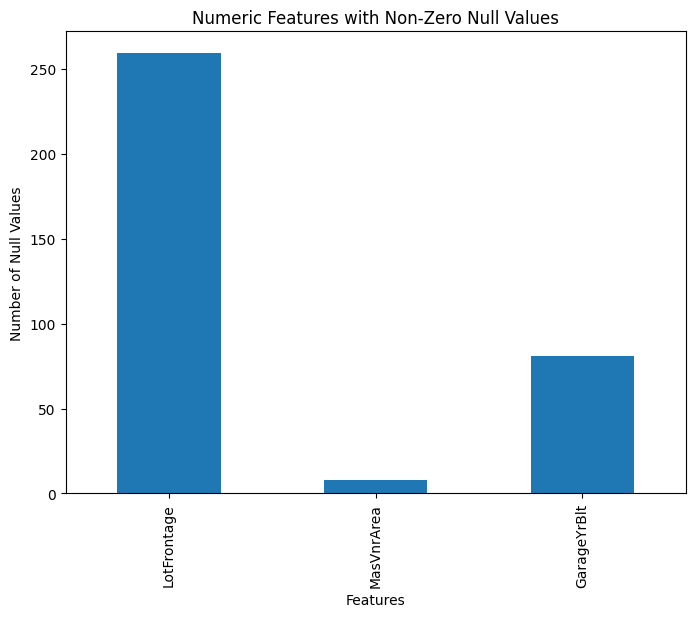

In [231]:
# Find numeric features with non-zero null values
null_counts = df[numeric_features].isnull().sum()
non_zero_nulls = null_counts[null_counts > 0]

# Plot the null counts
plt.figure(figsize=(8, 6))
non_zero_nulls.plot(kind='bar')
plt.title('Numeric Features with Non-Zero Null Values')
plt.xlabel('Features')
plt.ylabel('Number of Null Values')
plt.show()

In [232]:
# Fill missing values in LotFrontage with the median value by Neighborhood
# Fill missing values in LotFrontage with the median value by Neighborhood for df
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# Map the medians by Neighborhood and use them to fill NaN values in d
neighborhood_medians = df.groupby('Neighborhood')['LotFrontage'].median()
d['LotFrontage'] = d.apply(lambda row: neighborhood_medians[row['Neighborhood']] if pd.isnull(row['LotFrontage']) else row['LotFrontage'], axis=1)

In [233]:
# Filter the dataframe where MasVnrArea is 0
mas_vnr_area_zero = df[df['MasVnrArea'] == 0]

# Obtain the frequency of MasVnrType for these rows
mas_vnr_type_freq = mas_vnr_area_zero['MasVnrType'].value_counts()

print(mas_vnr_type_freq)

MasVnrType
NA         859
BrkFace      1
Stone        1
Name: count, dtype: int64


In [234]:
# Calculate the median values for 'MasVnrArea' based on 'MasVnrType'
median_brkface = df[df['MasVnrType'] == 'BrkFace']['MasVnrArea'].median()
median_stone = df[df['MasVnrType'] == 'Stone']['MasVnrArea'].median()

# Define a function to fill 'MasVnrArea' based on 'MasVnrType'
def fill_mas_vnr_area(row):
    if row['MasVnrType'] == 'NA':
        return 0
    elif row['MasVnrType'] == 'BrkFace':
        return median_brkface
    elif row['MasVnrType'] == 'Stone':
        return median_stone
    else:
        return row['MasVnrArea']

# Apply the function to fill 'MasVnrArea'
df['MasVnrArea'] = df.apply(fill_mas_vnr_area, axis=1)
d['MasVnrArea'] = d.apply(fill_mas_vnr_area, axis=1)

In [235]:
correlation = df['GarageYrBlt'].corr(df['YearBuilt'])
print(f"Correlation between GarageYrBlt and YearBuilt: {correlation:.2f}")

Correlation between GarageYrBlt and YearBuilt: 0.83


In [236]:
df.drop('GarageYrBlt', axis=1, inplace=True)
d.drop('GarageYrBlt', axis=1, inplace=True)

Pair: GarageArea - GarageCars, Correlation: 0.88
Pair: GrLivArea - TotRmsAbvGrd, Correlation: 0.83
Pair: 1stFlrSF - TotalBsmtSF, Correlation: 0.82
Pair: OverallQual - SalePrice, Correlation: 0.79
Pair: GarageYrBlt - YearBuilt, Correlation: 0.83
Obtained from earlier

In [237]:
# Drop GarageCars as it is highly correlated with GarageArea
df.drop('GarageCars', axis=1, inplace=True)
d.drop('GarageCars', axis=1, inplace=True)


In [238]:
if df.isnull().sum().any():
    print("There are columns with null values.")
else:
    print("No Null Values")

No Null Values


In [239]:
if d.isnull().sum().any():
    print("There are columns with null values.")
else:
    print("No Null Values")

There are columns with null values.


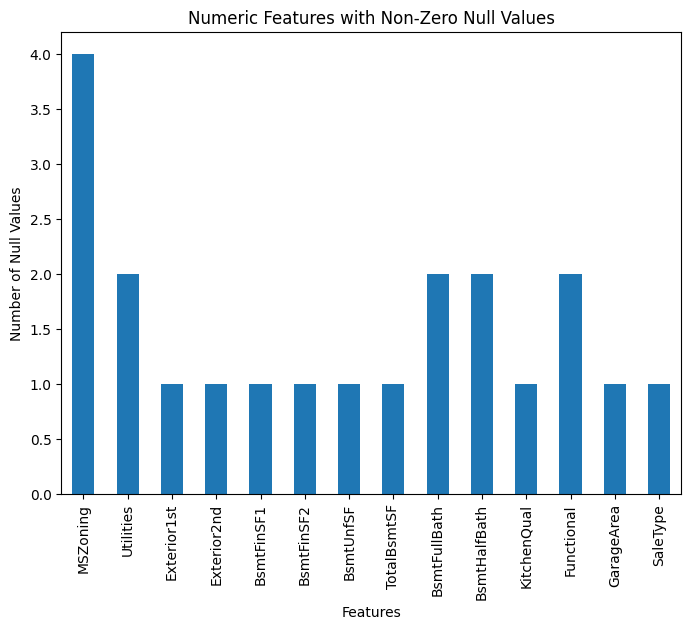

In [240]:
# Find numeric features with non-zero null values
null_counts = d.isnull().sum()
non_zero_nulls = null_counts[null_counts > 0]

# Plot the null counts
plt.figure(figsize=(8, 6))
non_zero_nulls.plot(kind='bar')
plt.title('Numeric Features with Non-Zero Null Values')
plt.xlabel('Features')
plt.ylabel('Number of Null Values')
plt.show()

In [241]:
# List of columns to fill with mode
columns_to_fill = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional', 'SaleType']

# Fill missing values in each column with the mode of the corresponding column in df
for col in columns_to_fill:
    mode_value = df[col].mode()[0]
    d[col].fillna(mode_value, inplace=True)

In [242]:
# Calculate the median value of 'GarageArea' from df
median_garage_area = df['GarageArea'].median()

# Fill missing values in 'GarageArea' in d with the median value
d['GarageArea'].fillna(median_garage_area, inplace=True)

In [243]:
if d.isnull().sum().any():
    print("There are columns with null values.")
else:
    print("No Null Values")

There are columns with null values.


In [244]:
columns_to_drop = ['RoofMatl', 'Heating', 'Utilities', 'Functional', 'GarageCond', 'Street', 'Condition2', 'LandSlope']
df.drop(columns=columns_to_drop, axis=1, inplace=True)
d.drop(columns=columns_to_drop, axis=1, inplace=True)

In [245]:
df.shape

(1460, 68)

In [246]:
d.shape

(1459, 67)

In [247]:
# List of numeric features
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

# List of categorical features
categorical_features = df.select_dtypes(include=[object]).columns.tolist()

print("Numeric Features:", numeric_features)
print("Categorical Features:", categorical_features)

Numeric Features: ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Categorical Features: ['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition']


In [ ]:
# Create new feature 'TotalSF' in df
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

d['TotalBsmtSF'].replace('NA', 0, inplace=True)
d['TotalBsmtSF'].replace('NA', 0, inplace=True)
d['TotalBsmtSF'].replace('NA', 0, inplace=True)

d['TotalBsmtSF'] = d['TotalBsmtSF'].astype(int)
d['1stFlrSF'] = d['1stFlrSF'].astype(int)
d['2ndFlrSF'] = d['2ndFlrSF'].astype(int)

# Create new feature 'TotalSF' in d
d['TotalSF'] = d['TotalBsmtSF'] + d['1stFlrSF'] + d['2ndFlrSF']

# Display the first few rows to verify the new feature
print(df[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'TotalSF']].head())
print(d[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'TotalSF']].head())

   TotalBsmtSF  1stFlrSF  2ndFlrSF  TotalSF
0          856       856       854     2566
1         1262      1262         0     2524
2          920       920       866     2706
3          756       961       756     2473
4         1145      1145      1053     3343
   TotalBsmtSF  1stFlrSF  2ndFlrSF  TotalSF
0        882.0     896.0       0.0   1778.0
1       1329.0    1329.0       0.0   2658.0
2        928.0     928.0     701.0   2557.0
3        926.0     926.0     678.0   2530.0
4       1280.0    1280.0       0.0   2560.0


In [248]:
columns_to_check = ['LowQualFinSF', 'KitchenAbvGr', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

for col in columns_to_check:
    most_freq_val_percentage = df[col].value_counts(normalize=True).max() * 100
    print(f"The most frequent value in {col} appears {most_freq_val_percentage:.2f}% of the time.")

The most frequent value in LowQualFinSF appears 98.22% of the time.
The most frequent value in KitchenAbvGr appears 95.34% of the time.
The most frequent value in EnclosedPorch appears 85.75% of the time.
The most frequent value in ScreenPorch appears 92.05% of the time.
The most frequent value in PoolArea appears 99.52% of the time.
The most frequent value in MiscVal appears 96.44% of the time.


In [249]:
columns_to_drop = ['LowQualFinSF', 'KitchenAbvGr', 'ScreenPorch', 'PoolArea', 'MiscVal']
df.drop(columns=columns_to_drop, axis=1, inplace=True)
d.drop(columns=columns_to_drop, axis=1, inplace=True)

In [250]:
df.shape

(1460, 63)

In [251]:
# List to store columns where mode occupies >= 90%
high_mode_columns = []

# Iterate through each categorical feature
for col in categorical_features:
    mode_percentage = df[col].value_counts(normalize=True).max() * 100
    if mode_percentage >= 95:
        high_mode_columns.append(col)

print("Columns where mode occupies >= 95%:", high_mode_columns)

Columns where mode occupies >= 95%: []


In [252]:
if d.isnull().sum().any():
    print("There are columns with null values.")
else:
    print("No Null Values")

There are columns with null values.


In [253]:
if df.isnull().sum().any():
    print("There are columns with null values.")
else:
    print("No Null Values")

No Null Values


In [254]:
df['age_of_house'] = df['YrSold'] - df['YearBuilt']
d['age_of_house'] = d['YrSold'] - d['YearBuilt']

In [255]:
# Calculate the correlation of YrSold, YearBuilt, and age_of_house with SalePrice
correlation_yrsold = df['YrSold'].corr(df['SalePrice'])
correlation_yearbuilt = df['YearBuilt'].corr(df['SalePrice'])
correlation_age_of_house = df['age_of_house'].corr(df['SalePrice'])

print(f"Correlation of YrSold with SalePrice: {correlation_yrsold:.2f}")
print(f"Correlation of YearBuilt with SalePrice: {correlation_yearbuilt:.2f}")
print(f"Correlation of age_of_house with SalePrice: {correlation_age_of_house:.2f}")

Correlation of YrSold with SalePrice: -0.03
Correlation of YearBuilt with SalePrice: 0.52
Correlation of age_of_house with SalePrice: -0.52


In [256]:
df.drop('YrSold', axis=1, inplace=True)
d.drop('YrSold', axis=1, inplace=True)

In [257]:
# List of numeric features
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

# List of categorical features
categorical_features = df.select_dtypes(include=[object]).columns.tolist()

print("Numeric Features:", numeric_features)
print("Categorical Features:", categorical_features)

Numeric Features: ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'MoSold', 'SalePrice', 'age_of_house']
Categorical Features: ['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition']


In [258]:
from scipy.stats import skew
import numpy as np

def transform_numerical_features(train_df, test_df, skew_threshold=1.0):
    """
    Ensures both train and test sets receive the same transformations based on skewness from train data.
    
    Parameters:
    train_df (pd.DataFrame): Training data containing numerical features.
    test_df (pd.DataFrame): Test data containing numerical features.
    skew_threshold (float): Threshold above which a transformation is applied.
    
    Returns:
    pd.DataFrame, pd.DataFrame: Transformed train and test data.
    """
    train_df_transformed = train_df.copy()
    test_df_transformed = test_df.copy()
    train_df_transformed.drop('SalePrice',axis=1,inplace=True)
   

    # Identify numerical features
    numerical_features = train_df_transformed.select_dtypes(include=[np.number]).columns.tolist()

    # Compute skewness **only from the training set**
    skewness_values = train_df_transformed[numerical_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
    skewed_cols = skewness_values[skewness_values > skew_threshold].index

    # Apply the same transformation to both train and test
    for col in skewed_cols:
        train_df_transformed[col] = np.log1p(train_df_transformed[col])
        test_df_transformed[col] = np.log1p(test_df_transformed[col])  # Apply to test!
    train_df_transformed = pd.concat([train_df_transformed,df['SalePrice']],axis=1)

    return train_df_transformed, test_df_transformed

# Apply the fixed transformation
tdf, td = transform_numerical_features(df, d)




In [259]:
print(categorical_features)

['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition']


In [260]:
d1 = tdf.copy()
d2 = td.copy()

In [261]:
# Convert categorical features to dtype('category') in d1
for col in categorical_features:
    d1[col] = d1[col].astype('category')

# Convert categorical features to dtype('category') in d2
for col in categorical_features:
    d2[col] = d2[col].astype('category')

In [262]:
d1.shape

(1460, 63)

In [263]:
d2.shape

(1459, 62)

In [264]:
d1['SalePrice'].head(2)

0    208500
1    181500
Name: SalePrice, dtype: int64

In [265]:
if d2.isnull().sum().any():
    print("There are columns with null values.")
else:
    print("No Null Values")

There are columns with null values.


In [266]:
# Find columns with non-zero null values in d2
null_counts_d2 = d2.isnull().sum()
non_zero_nulls_d2 = null_counts_d2[null_counts_d2 > 0]

# Display the columns with non-zero null values
print(non_zero_nulls_d2)

BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
dtype: int64


In [267]:
# Fill null values in 'TotalBsmtSF' and 'BsmtUnfSF' with 0
d2['TotalBsmtSF'].fillna(0, inplace=True)
d2['BsmtUnfSF'].fillna(0, inplace=True)

# Fill null values in other columns from non_zero_nulls_d2 with 'NA'
columns_to_fill_na = non_zero_nulls_d2.index.difference(['TotalBsmtSF', 'BsmtUnfSF'])
d2[columns_to_fill_na] = d2[columns_to_fill_na].fillna('NA')

In [268]:
# Find columns with non-zero null values in d2
null_counts_d21 = d2.isnull().sum()
non_zero_nulls_d21 = null_counts_d2[null_counts_d21 > 0]

# Display the columns with non-zero null values
print(non_zero_nulls_d21)

Series([], dtype: int64)


In [269]:
# Save d1 to a CSV file called c1.csv
d1.to_csv('D:\Housing\data\c1.csv', index=False)

# Save d2 to a CSV file called c2.csv
d2.to_csv('D:\Housing\data\c2.csv', index=False)